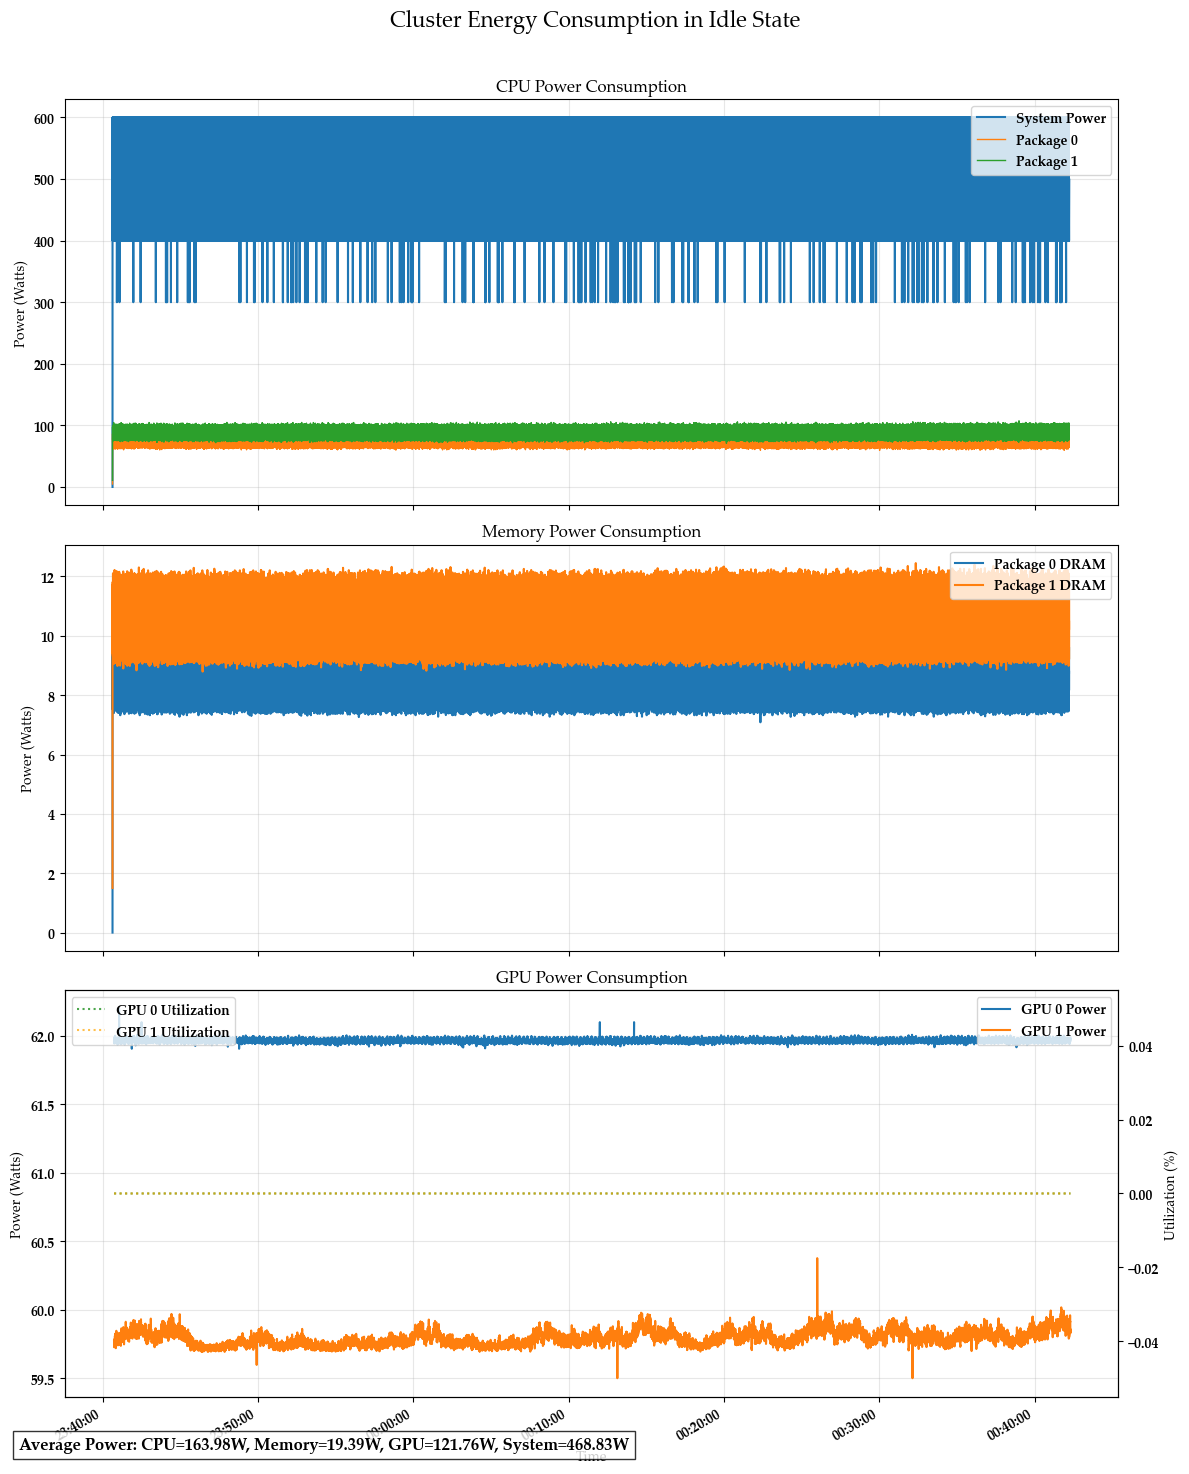

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np
import matplotlib
import matplotlib.gridspec as gridspec

matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Palatino Linotype"
matplotlib.rcParams['font.weight'] = "bold"

# Load the CSV files
cpu_data = pd.read_csv('cpu_1_hour.csv')
gpu_data = pd.read_csv('gpu_1_hour.csv')

# Use format='mixed' to automatically handle different timestamp formats
cpu_data['timestamp'] = pd.to_datetime(cpu_data['timestamp'], format='mixed')
gpu_data['timestamp'] = pd.to_datetime(gpu_data['timestamp'], format='mixed')

# Create a figure with subplots - now with 3 subplots instead of 2
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15), sharex=True)
fig.suptitle('Cluster Energy Consumption in Idle State', fontsize=16)

# Plot CPU power data
ax1.plot(cpu_data['timestamp'], cpu_data['psys_power_watts'], label='System Power', linewidth=1.5)
ax1.plot(cpu_data['timestamp'], cpu_data['package-0_power_watts'], label='Package 0', linewidth=1)
ax1.plot(cpu_data['timestamp'], cpu_data['package-1_power_watts'], label='Package 1', linewidth=1)

# Set CPU plot labels and grid
ax1.set_ylabel('Power (Watts)')
ax1.set_title('CPU Power Consumption')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right')

# Plot Memory (DRAM) power data
ax2.plot(cpu_data['timestamp'], cpu_data['package-0-dram_power_watts'], label='Package 0 DRAM', linewidth=1.5)
ax2.plot(cpu_data['timestamp'], cpu_data['package-1-dram_power_watts'], label='Package 1 DRAM', linewidth=1.5)

# Set Memory plot labels and grid
ax2.set_ylabel('Power (Watts)')
ax2.set_title('Memory Power Consumption')
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right')

# Plot GPU power data
ax3.plot(gpu_data['timestamp'], gpu_data['gpu0_power_watts'], label='GPU 0 Power', linewidth=1.5)
ax3.plot(gpu_data['timestamp'], gpu_data['gpu1_power_watts'], label='GPU 1 Power', linewidth=1.5)

# Optional: Plot GPU utilization on secondary axis
ax3_util = ax3.twinx()
ax3_util.plot(gpu_data['timestamp'], gpu_data['gpu0_utilization_gpu_percent'], 
              label='GPU 0 Utilization', linestyle=':', color='green', alpha=0.7)
ax3_util.plot(gpu_data['timestamp'], gpu_data['gpu1_utilization_gpu_percent'], 
              label='GPU 1 Utilization', linestyle=':', color='orange', alpha=0.7)
ax3_util.set_ylabel('Utilization (%)')
ax3_util.legend(loc='upper left')

# Set GPU plot labels and grid
ax3.set_xlabel('Time')
ax3.set_ylabel('Power (Watts)')
ax3.set_title('GPU Power Consumption')
ax3.grid(True, alpha=0.3)
ax3.legend(loc='upper right')

# Format x-axis to show time clearly
plt.gcf().autofmt_xdate()
date_format = mdates.DateFormatter('%H:%M:%S')
ax3.xaxis.set_major_formatter(date_format)

# Calculate and display total average power
avg_cpu_power = (cpu_data['package-0_power_watts'].mean() + 
                 cpu_data['package-1_power_watts'].mean())
avg_mem_power = (cpu_data['package-0-dram_power_watts'].mean() + 
                cpu_data['package-1-dram_power_watts'].mean())
avg_gpu_power = gpu_data['gpu0_power_watts'].mean() + gpu_data['gpu1_power_watts'].mean()
system_power = cpu_data['psys_power_watts'].mean()
total_avg_power = system_power

# Add text annotation with average power consumption
fig.text(0.02, 0.02, 
         f'Average Power: CPU={avg_cpu_power:.2f}W, Memory={avg_mem_power:.2f}W, GPU={avg_gpu_power:.2f}W, System={system_power:.2f}W', 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.92)

# Save the figure
plt.savefig('power_trends.pdf', dpi=300)

# Show the plot
plt.show()

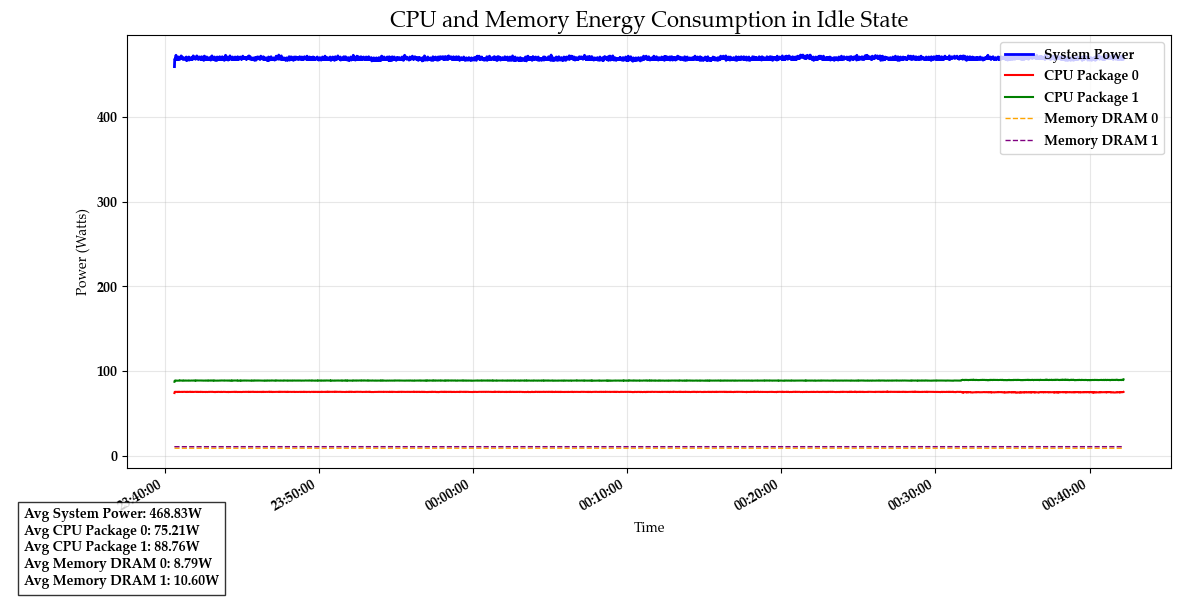

In [9]:
# Each column in the csv file (collected from Intel's Running Average Power Limit (RAPL)):

# timestamp: The exact date and time when the power measurement was taken
# psys_power_watts: System-level power consumption in watts. This represents the overall power drawn by the system components being monitored.
# package-0_power_watts: Power consumption of CPU package 0 in watts. In a multi-CPU system, this is one of the physical CPU packages.
# package-0-dram_power_watts: Power consumption of the DRAM (memory) associated with CPU package 0 in watts.
# package-1_power_watts: Power consumption of CPU package 1 in watts. This is the second CPU package in the system.
# package-1-dram_power_watts: Power consumption of the DRAM (memory) associated with CPU package 1 in watts.

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Load CPU data file
cpu_data = pd.read_csv('cpu_1_hour.csv')

# Convert timestamps to datetime objects using mixed format to handle different timestamp formats
cpu_data['timestamp'] = pd.to_datetime(cpu_data['timestamp'], format='mixed')

# Set timestamp as index
cpu_data.set_index('timestamp', inplace=True)

# Resample data to one sample per second (taking the mean)
cpu_data_resampled = cpu_data.resample('1s').mean()

# Reset index to make timestamp a column again
cpu_data_resampled.reset_index(inplace=True)

# Create the figure
plt.figure(figsize=(12, 6))

# Plot CPU power data
plt.plot(cpu_data_resampled['timestamp'], cpu_data_resampled['psys_power_watts'], 
         label='System Power', linewidth=2, color='blue')
plt.plot(cpu_data_resampled['timestamp'], cpu_data_resampled['package-0_power_watts'], 
         label='CPU Package 0', linewidth=1.5, color='red')
plt.plot(cpu_data_resampled['timestamp'], cpu_data_resampled['package-1_power_watts'], 
         label='CPU Package 1', linewidth=1.5, color='green')
plt.plot(cpu_data_resampled['timestamp'], cpu_data_resampled['package-0-dram_power_watts'], 
         label='Memory DRAM 0', linewidth=1, linestyle='--', color='orange')
plt.plot(cpu_data_resampled['timestamp'], cpu_data_resampled['package-1-dram_power_watts'], 
         label='Memory DRAM 1', linewidth=1, linestyle='--', color='purple')

# Set chart title and labels
plt.title('CPU and Memory Energy Consumption in Idle State', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Power (Watts)')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right')

# Format x-axis to display time clearly
plt.gcf().autofmt_xdate()
date_format = mdates.DateFormatter('%H:%M:%S')
plt.gca().xaxis.set_major_formatter(date_format)

# Calculate average power for all components
avg_system_power = cpu_data_resampled['psys_power_watts'].mean()
avg_package0_power = cpu_data_resampled['package-0_power_watts'].mean()
avg_package1_power = cpu_data_resampled['package-1_power_watts'].mean()
avg_dram0_power = cpu_data_resampled['package-0-dram_power_watts'].mean()
avg_dram1_power = cpu_data_resampled['package-1-dram_power_watts'].mean()

# Add annotation with average power consumption including memory
plt.annotate(f'Avg System Power: {avg_system_power:.2f}W\n'
             f'Avg CPU Package 0: {avg_package0_power:.2f}W\n'
             f'Avg CPU Package 1: {avg_package1_power:.2f}W\n'
             f'Avg Memory DRAM 0: {avg_dram0_power:.2f}W\n'
             f'Avg Memory DRAM 1: {avg_dram1_power:.2f}W',
             xy=(0.02, 0.02), xycoords='figure fraction',
             fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('cpu_energy_consumption.pdf', dpi=300)

# Show the figure
plt.show()

Each column in the csv file:
- timestamp: The exact date and time when the power measurement was taken
- psys_power_watts: System-level power consumption in watts. This represents the overall power drawn by the system components being monitored.
- package-0_power_watts: Power consumption of CPU package 0 in watts. In a multi-CPU system, this is one of the physical CPU packages.
- package-0-dram_power_watts: Power consumption of the DRAM (memory) associated with CPU package 0 in watts.
- package-1_power_watts: Power consumption of CPU package 1 in watts. This is the second CPU package in the system.
- package-1-dram_power_watts: Power consumption of the DRAM (memory) associated with CPU package 1 in watts.

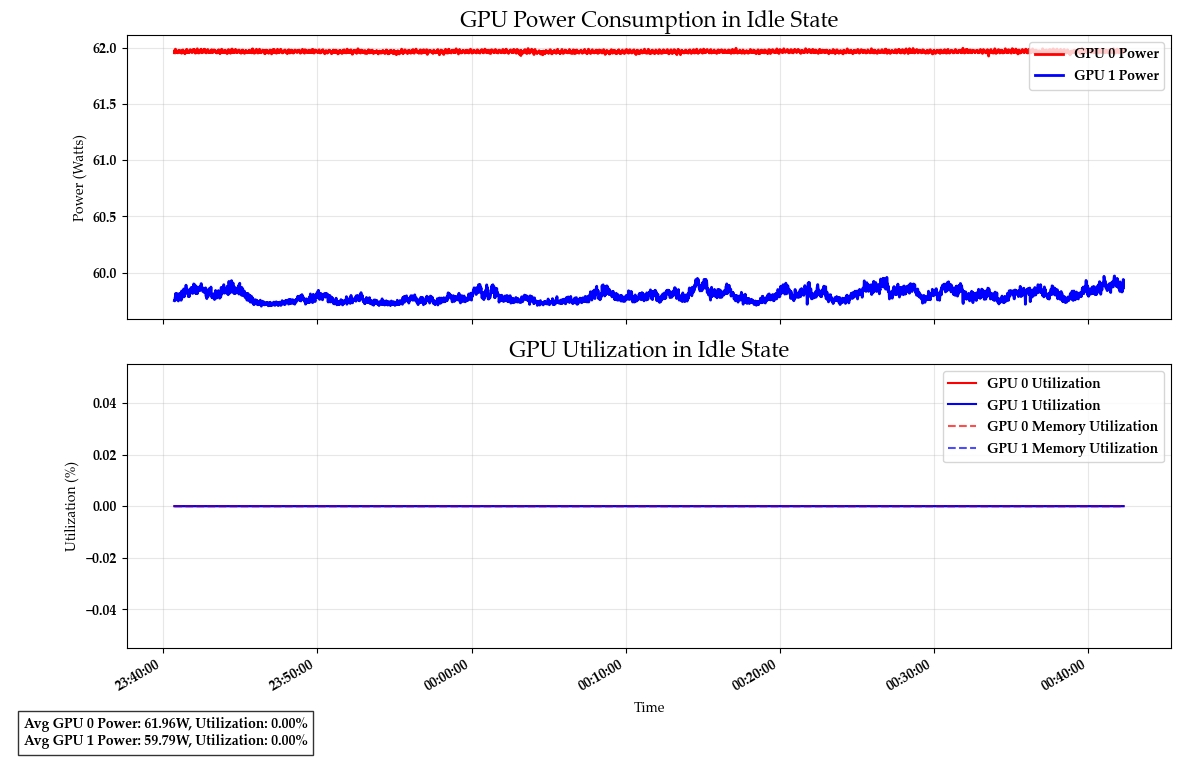

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Load GPU data file
gpu_data = pd.read_csv('gpu_1_hour.csv')

# Convert timestamps to datetime objects using mixed format to handle different timestamp formats
gpu_data['timestamp'] = pd.to_datetime(gpu_data['timestamp'], format='mixed')

# Set timestamp as index
gpu_data.set_index('timestamp', inplace=True)

# Resample data to one sample per second (taking the mean)
gpu_data_resampled = gpu_data.resample('1s').mean()

# Reset index to make timestamp a column again
gpu_data_resampled.reset_index(inplace=True)

# Create the figure
plt.figure(figsize=(12, 8))

# Plot GPU power data
plt.subplot(2, 1, 1)
plt.plot(gpu_data_resampled['timestamp'], gpu_data_resampled['gpu0_power_watts'], 
         label='GPU 0 Power', linewidth=2, color='red')
plt.plot(gpu_data_resampled['timestamp'], gpu_data_resampled['gpu1_power_watts'], 
         label='GPU 1 Power', linewidth=2, color='blue')

# Set power plot labels and grid
plt.title('GPU Power Consumption in Idle State', fontsize=16)
plt.ylabel('Power (Watts)')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right')

# Plot GPU utilization data
plt.subplot(2, 1, 2)
plt.plot(gpu_data_resampled['timestamp'], gpu_data_resampled['gpu0_utilization_gpu_percent'], 
         label='GPU 0 Utilization', linewidth=1.5, color='red')
plt.plot(gpu_data_resampled['timestamp'], gpu_data_resampled['gpu1_utilization_gpu_percent'], 
         label='GPU 1 Utilization', linewidth=1.5, color='blue')
plt.plot(gpu_data_resampled['timestamp'], gpu_data_resampled['gpu0_utilization_memory_percent'], 
         label='GPU 0 Memory Utilization', linewidth=1.5, linestyle='--', color='red', alpha=0.7)
plt.plot(gpu_data_resampled['timestamp'], gpu_data_resampled['gpu1_utilization_memory_percent'], 
         label='GPU 1 Memory Utilization', linewidth=1.5, linestyle='--', color='blue', alpha=0.7)

# Set utilization plot labels and grid
plt.xlabel('Time')
plt.ylabel('Utilization (%)')
plt.title('GPU Utilization in Idle State', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right')

# Format x-axis to display time clearly for both subplots
plt.gcf().autofmt_xdate()
date_format = mdates.DateFormatter('%H:%M:%S')
for ax in plt.gcf().axes:
    ax.xaxis.set_major_formatter(date_format)

# Calculate average power and utilization
avg_gpu0_power = gpu_data_resampled['gpu0_power_watts'].mean()
avg_gpu1_power = gpu_data_resampled['gpu1_power_watts'].mean()
avg_gpu0_util = gpu_data_resampled['gpu0_utilization_gpu_percent'].mean()
avg_gpu1_util = gpu_data_resampled['gpu1_utilization_gpu_percent'].mean()

# Add annotation with average values
plt.annotate(f'Avg GPU 0 Power: {avg_gpu0_power:.2f}W, Utilization: {avg_gpu0_util:.2f}%\n'
             f'Avg GPU 1 Power: {avg_gpu1_power:.2f}W, Utilization: {avg_gpu1_util:.2f}%',
             xy=(0.02, 0.04), xycoords='figure fraction',
             fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('gpu_energy_consumption.pdf', dpi=300)

# Show the figure
plt.show()

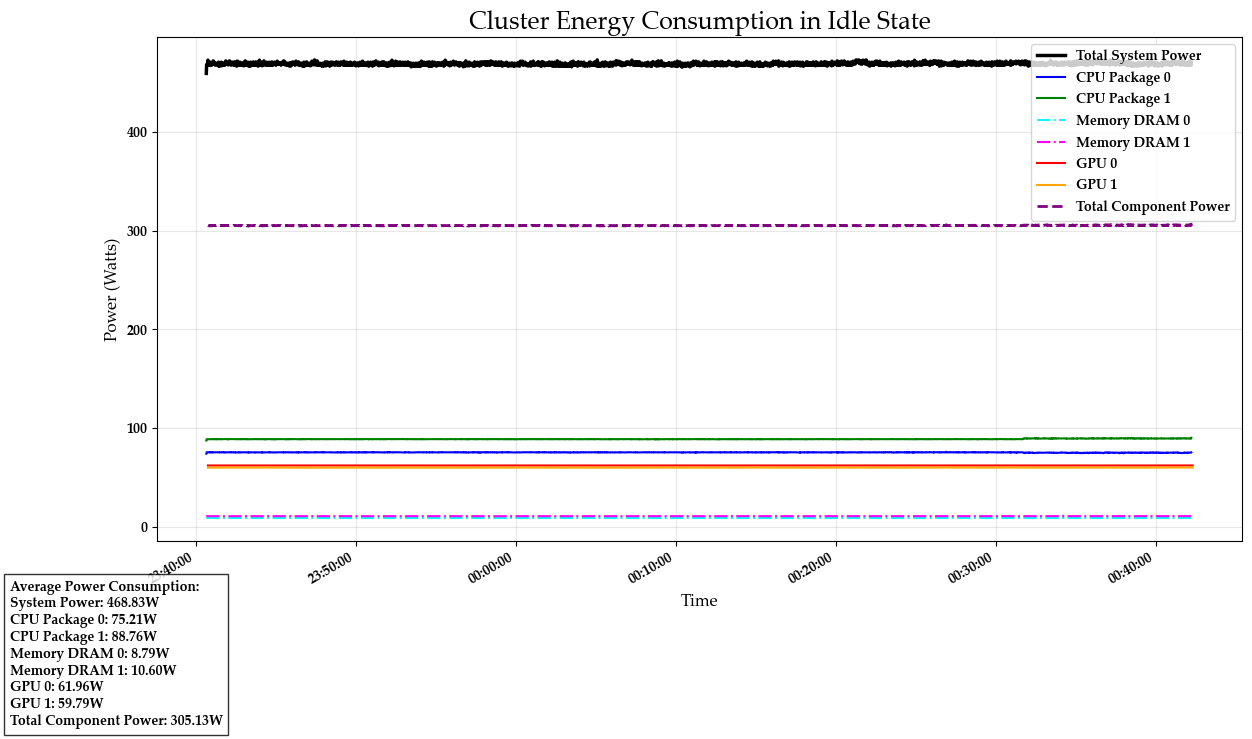

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Load CPU and GPU data files
cpu_data = pd.read_csv('cpu_1_hour.csv')
gpu_data = pd.read_csv('gpu_1_hour.csv')

# Convert timestamps to datetime objects
cpu_data['timestamp'] = pd.to_datetime(cpu_data['timestamp'], format='mixed')
gpu_data['timestamp'] = pd.to_datetime(gpu_data['timestamp'], format='mixed')

# Set timestamp as index
cpu_data.set_index('timestamp', inplace=True)
gpu_data.set_index('timestamp', inplace=True)

# Resample data to one sample per second
cpu_data_resampled = cpu_data.resample('1s').mean()
gpu_data_resampled = gpu_data.resample('1s').mean()

# Reset indices
cpu_data_resampled.reset_index(inplace=True)
gpu_data_resampled.reset_index(inplace=True)

# Create the figure
plt.figure(figsize=(14, 8))

# Plot CPU, Memory, and GPU power data on the same axis
plt.plot(cpu_data_resampled['timestamp'], cpu_data_resampled['psys_power_watts'], 
         label='Total System Power', linewidth=2.5, color='black')
plt.plot(cpu_data_resampled['timestamp'], cpu_data_resampled['package-0_power_watts'], 
         label='CPU Package 0', linewidth=1.5, color='blue')
plt.plot(cpu_data_resampled['timestamp'], cpu_data_resampled['package-1_power_watts'], 
         label='CPU Package 1', linewidth=1.5, color='green')
plt.plot(cpu_data_resampled['timestamp'], cpu_data_resampled['package-0-dram_power_watts'], 
         label='Memory DRAM 0', linewidth=1.5, color='cyan', linestyle='-.')
plt.plot(cpu_data_resampled['timestamp'], cpu_data_resampled['package-1-dram_power_watts'], 
         label='Memory DRAM 1', linewidth=1.5, color='magenta', linestyle='-.')
plt.plot(gpu_data_resampled['timestamp'], gpu_data_resampled['gpu0_power_watts'], 
         label='GPU 0', linewidth=1.5, color='red')
plt.plot(gpu_data_resampled['timestamp'], gpu_data_resampled['gpu1_power_watts'], 
         label='GPU 1', linewidth=1.5, color='orange')

# Calculate total power (sum of all components)
# Create a common timestamp range for merging
common_df = pd.merge_asof(
    gpu_data_resampled[['timestamp', 'gpu0_power_watts', 'gpu1_power_watts']], 
    cpu_data_resampled[['timestamp', 'package-0_power_watts', 'package-1_power_watts', 
                        'package-0-dram_power_watts', 'package-1-dram_power_watts']], 
    on='timestamp', 
    direction='nearest'
)

# Calculate total component power (not including system power which might double-count)
common_df['total_component_power'] = (
    common_df['gpu0_power_watts'] + 
    common_df['gpu1_power_watts'] + 
    common_df['package-0_power_watts'] + 
    common_df['package-1_power_watts'] +
    common_df['package-0-dram_power_watts'] + 
    common_df['package-1-dram_power_watts']
)

# Plot total component power
plt.plot(common_df['timestamp'], common_df['total_component_power'], 
         label='Total Component Power', linewidth=2, color='purple', linestyle='--')

# Set chart title and labels
plt.title('Cluster Energy Consumption in Idle State', fontsize=18)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Power (Watts)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right', fontsize=10)

# Format x-axis to display time clearly
plt.gcf().autofmt_xdate()
date_format = mdates.DateFormatter('%H:%M:%S')
plt.gca().xaxis.set_major_formatter(date_format)

# Calculate average power values
avg_system_power = cpu_data_resampled['psys_power_watts'].mean()
avg_package0_power = cpu_data_resampled['package-0_power_watts'].mean()
avg_package1_power = cpu_data_resampled['package-1_power_watts'].mean()
avg_dram0_power = cpu_data_resampled['package-0-dram_power_watts'].mean()
avg_dram1_power = cpu_data_resampled['package-1-dram_power_watts'].mean()
avg_gpu0_power = gpu_data_resampled['gpu0_power_watts'].mean()
avg_gpu1_power = gpu_data_resampled['gpu1_power_watts'].mean()
avg_component_power = common_df['total_component_power'].mean()

# Add annotation with average power consumption
plt.figtext(0.02, 0.02, 
            f'Average Power Consumption:\n'
            f'System Power: {avg_system_power:.2f}W\n'
            f'CPU Package 0: {avg_package0_power:.2f}W\n'
            f'CPU Package 1: {avg_package1_power:.2f}W\n'
            f'Memory DRAM 0: {avg_dram0_power:.2f}W\n'
            f'Memory DRAM 1: {avg_dram1_power:.2f}W\n'
            f'GPU 0: {avg_gpu0_power:.2f}W\n'
            f'GPU 1: {avg_gpu1_power:.2f}W\n'
            f'Total Component Power: {avg_component_power:.2f}W',
            fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout to make room for the table
plt.subplots_adjust(bottom=0.25)

# Save the figure
plt.savefig('combined_energy_consumption.pdf', dpi=300)

# Show the figure
plt.show()

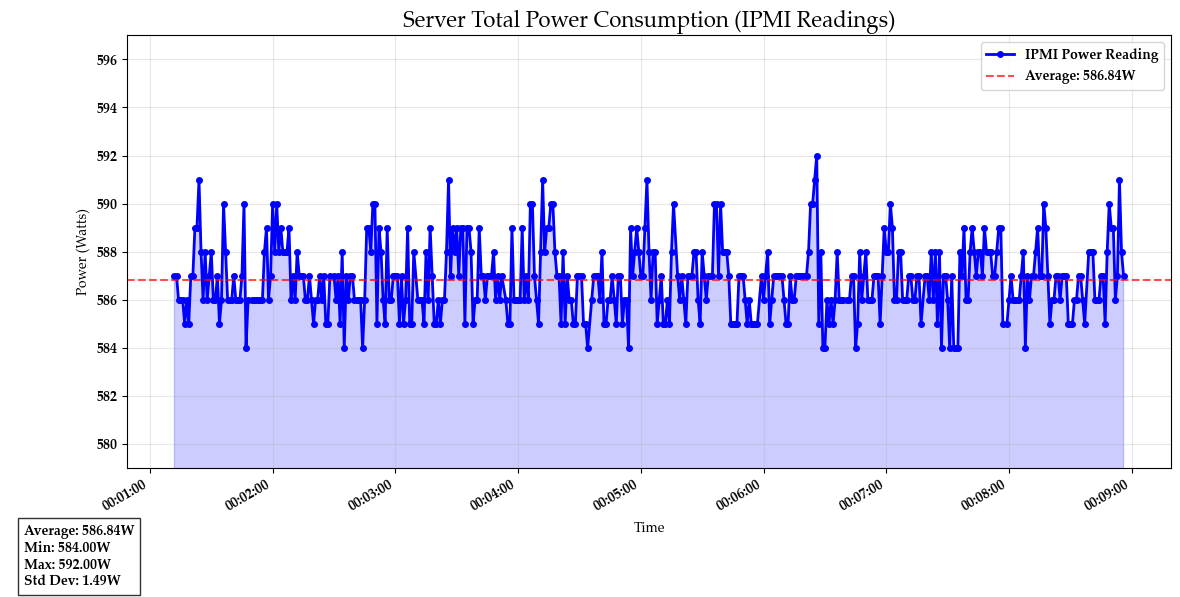

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load IPMI power data
ipmi_data = pd.read_csv('power_1_hour.csv')

# Convert timestamp to datetime
ipmi_data['Timestamp'] = pd.to_datetime(ipmi_data['Timestamp'])

# Create figure
plt.figure(figsize=(12, 6))

# Plot IPMI power data
plt.plot(ipmi_data['Timestamp'], ipmi_data['PowerReading_Watts'], 
         label='IPMI Power Reading', linewidth=2, color='blue', marker='o', markersize=4)

# Fill area under the curve
plt.fill_between(ipmi_data['Timestamp'], ipmi_data['PowerReading_Watts'], 
                 alpha=0.2, color='blue')

# Set chart title and labels
plt.title('Server Total Power Consumption (IPMI Readings)', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Power (Watts)')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right')

# Format x-axis to display time clearly
plt.gcf().autofmt_xdate()
date_format = mdates.DateFormatter('%H:%M:%S')
plt.gca().xaxis.set_major_formatter(date_format)

# Calculate and display statistics
avg_power = ipmi_data['PowerReading_Watts'].mean()
min_power = ipmi_data['PowerReading_Watts'].min()
max_power = ipmi_data['PowerReading_Watts'].max()
std_power = ipmi_data['PowerReading_Watts'].std()

# Add annotation with statistics
plt.annotate(f'Average: {avg_power:.2f}W\n'
             f'Min: {min_power:.2f}W\n'
             f'Max: {max_power:.2f}W\n'
             f'Std Dev: {std_power:.2f}W',
             xy=(0.02, 0.02), xycoords='figure fraction',
             fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Set y-axis limits to better visualize variations
y_min = min_power - 5
y_max = max_power + 5
plt.ylim(y_min, y_max)

# Add horizontal line at average power
plt.axhline(y=avg_power, color='red', linestyle='--', alpha=0.7, 
            label=f'Average: {avg_power:.2f}W')

# Update legend to include the average line
plt.legend()

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('ipmi_power_readings.pdf', dpi=300)

# Show the figure
plt.show()

# Measurement Scopes:

- IPMI readings typically measure power at the power supply unit (PSU) level, capturing the entire server's power consumption.
- The psys_power_watts from Intel's API typically measures power at the system level but may not include all components.


# Power Supply Efficiency:

- Power supplies aren't 100% efficient. If your server has 80% efficient PSUs, approximately 20% of power drawn from the wall is lost as heat during conversion.
- IPMI reports the input power (what's drawn from the wall), while component-level measurements report what's actually delivered to components.


# Unmeasured Components:

- Intel's API might not account for all power-consuming components like fans, storage devices, network cards, etc.
- Some motherboard components might not be included in the Intel measurement.

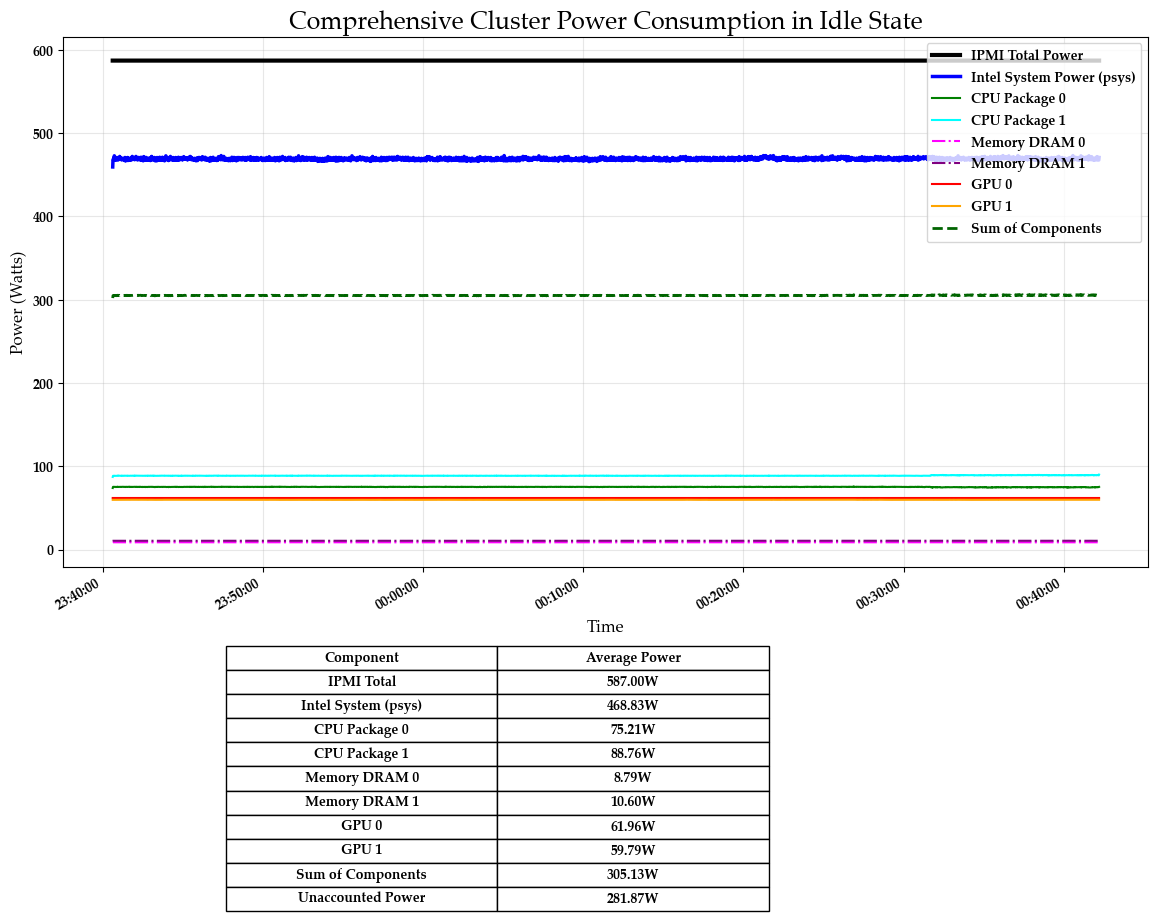

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Load all data files
cpu_data = pd.read_csv('cpu_1_hour.csv')
gpu_data = pd.read_csv('gpu_1_hour.csv')
ipmi_data = pd.read_csv('power_1_hour.csv')

# Convert timestamps to datetime objects
cpu_data['timestamp'] = pd.to_datetime(cpu_data['timestamp'], format='mixed')
gpu_data['timestamp'] = pd.to_datetime(gpu_data['timestamp'], format='mixed')
ipmi_data['Timestamp'] = pd.to_datetime(ipmi_data['Timestamp'])

# Set timestamp as index for resampling
cpu_data.set_index('timestamp', inplace=True)
gpu_data.set_index('timestamp', inplace=True)
ipmi_data.set_index('Timestamp', inplace=True)

# Resample data to one sample per second
cpu_data_resampled = cpu_data.resample('1s').mean()
gpu_data_resampled = gpu_data.resample('1s').mean()
# IPMI data is already at 1-second intervals, but resampling for consistency
ipmi_data_resampled = ipmi_data.resample('1s').mean()

# Reset indices
cpu_data_resampled.reset_index(inplace=True)
gpu_data_resampled.reset_index(inplace=True)
ipmi_data_resampled.reset_index(inplace=True)

# Rename timestamp column in IPMI data for consistency
ipmi_data_resampled.rename(columns={'Timestamp': 'timestamp'}, inplace=True)

# Create merged dataframe with all data aligned by timestamp
# First merge CPU and GPU data
merged_data = pd.merge_asof(
    cpu_data_resampled[['timestamp', 'psys_power_watts', 'package-0_power_watts', 'package-1_power_watts', 
                       'package-0-dram_power_watts', 'package-1-dram_power_watts']],
    gpu_data_resampled[['timestamp', 'gpu0_power_watts', 'gpu1_power_watts']],
    on='timestamp',
    direction='nearest'
)

# Then merge with IPMI data
merged_data = pd.merge_asof(
    merged_data,
    ipmi_data_resampled[['timestamp', 'PowerReading_Watts']],
    on='timestamp',
    direction='nearest'
)

# Create the figure
plt.figure(figsize=(14, 10))  # Increased figure height to make room for the table

# Plot all power data on the same axis
plt.plot(merged_data['timestamp'], merged_data['PowerReading_Watts'], 
         label='IPMI Total Power', linewidth=3, color='black')
plt.plot(merged_data['timestamp'], merged_data['psys_power_watts'], 
         label='Intel System Power (psys)', linewidth=2.5, color='blue')
plt.plot(merged_data['timestamp'], merged_data['package-0_power_watts'], 
         label='CPU Package 0', linewidth=1.5, color='green')
plt.plot(merged_data['timestamp'], merged_data['package-1_power_watts'], 
         label='CPU Package 1', linewidth=1.5, color='cyan')
plt.plot(merged_data['timestamp'], merged_data['package-0-dram_power_watts'], 
         label='Memory DRAM 0', linewidth=1.5, color='magenta', linestyle='-.')
plt.plot(merged_data['timestamp'], merged_data['package-1-dram_power_watts'], 
         label='Memory DRAM 1', linewidth=1.5, color='purple', linestyle='-.')
plt.plot(merged_data['timestamp'], merged_data['gpu0_power_watts'], 
         label='GPU 0', linewidth=1.5, color='red')
plt.plot(merged_data['timestamp'], merged_data['gpu1_power_watts'], 
         label='GPU 1', linewidth=1.5, color='orange')

# Calculate sum of component powers, now including memory
merged_data['component_sum'] = (
    merged_data['package-0_power_watts'] + 
    merged_data['package-1_power_watts'] + 
    merged_data['package-0-dram_power_watts'] + 
    merged_data['package-1-dram_power_watts'] + 
    merged_data['gpu0_power_watts'] + 
    merged_data['gpu1_power_watts']
)

# Plot sum of components
plt.plot(merged_data['timestamp'], merged_data['component_sum'], 
         label='Sum of Components', linewidth=2, color='darkgreen', linestyle='--')

# Set chart title and labels
plt.title('Comprehensive Cluster Power Consumption in Idle State', fontsize=18)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Power (Watts)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right', fontsize=10)

# Format x-axis to display time clearly
plt.gcf().autofmt_xdate()
date_format = mdates.DateFormatter('%H:%M:%S')
plt.gca().xaxis.set_major_formatter(date_format)

# Calculate average power values
avg_ipmi = merged_data['PowerReading_Watts'].mean()
avg_psys = merged_data['psys_power_watts'].mean()
avg_package0 = merged_data['package-0_power_watts'].mean()
avg_package1 = merged_data['package-1_power_watts'].mean()
avg_dram0 = merged_data['package-0-dram_power_watts'].mean()
avg_dram1 = merged_data['package-1-dram_power_watts'].mean()
avg_gpu0 = merged_data['gpu0_power_watts'].mean()
avg_gpu1 = merged_data['gpu1_power_watts'].mean()
avg_components = merged_data['component_sum'].mean()

# Create a table of average values
avg_data = [
    ['IPMI Total', f'{avg_ipmi:.2f}W'],
    ['Intel System (psys)', f'{avg_psys:.2f}W'],
    ['CPU Package 0', f'{avg_package0:.2f}W'],
    ['CPU Package 1', f'{avg_package1:.2f}W'],
    ['Memory DRAM 0', f'{avg_dram0:.2f}W'],
    ['Memory DRAM 1', f'{avg_dram1:.2f}W'],
    ['GPU 0', f'{avg_gpu0:.2f}W'],
    ['GPU 1', f'{avg_gpu1:.2f}W'],
    ['Sum of Components', f'{avg_components:.2f}W'],
    ['Unaccounted Power', f'{(avg_ipmi - avg_components):.2f}W']
]

# Create a table in the figure - adjusted position to account for more rows
table = plt.table(
    cellText=avg_data,
    colLabels=['Component', 'Average Power'],
    loc='bottom',
    bbox=[0.15, -0.65, 0.5, 0.50]  # [left, bottom, width, height] - adjusted for more rows
)

# Format the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.8)  # Increased height scaling

# Center text in all cells
for key, cell in table.get_celld().items():
    cell.set_text_props(ha='center', va='center')

# Make header row bold
for col in range(len(avg_data[0])):
    table[0, col].set_text_props(fontweight='bold')

# Adjust layout to make room for the larger table
plt.subplots_adjust(bottom=0.35)

# Save the figure
plt.savefig('comprehensive_power_analysis.pdf', dpi=300)

# Show the figure
plt.show()

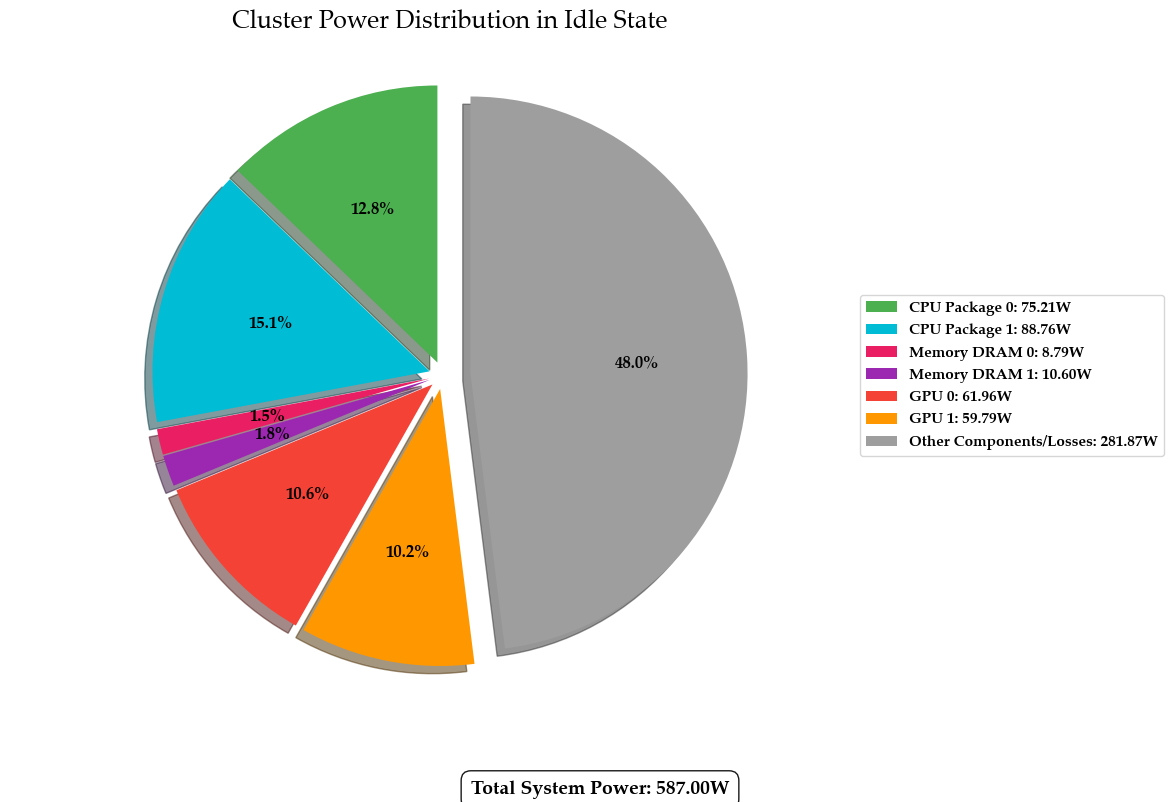

In [14]:
# Calculate sum of component powers, now including memory
avg_memory0 = avg_dram0  # Using the memory variables defined earlier
avg_memory1 = avg_dram1
avg_components = avg_package0 + avg_package1 + avg_memory0 + avg_memory1 + avg_gpu0 + avg_gpu1

# Calculate unaccounted power (difference between IPMI total and sum of components)
unaccounted_power = avg_ipmi - avg_components

# Create a separate figure for the pie chart
plt.figure(figsize=(12, 8))  # Made slightly wider to accommodate legend on right

# Data for pie chart, now including memory
power_values = [avg_package0, avg_package1, avg_memory0, avg_memory1, avg_gpu0, avg_gpu1, unaccounted_power]
labels = ['CPU Package 0', 'CPU Package 1', 'Memory DRAM 0', 'Memory DRAM 1', 'GPU 0', 'GPU 1', 'Other Components/Losses']
colors = ['#4CAF50', '#00BCD4', '#E91E63', '#9C27B0', '#F44336', '#FF9800', '#9E9E9E']
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1)  # Explode "Other" wedge slightly more

# Create pie chart
plt.pie(power_values, labels=None,  # Removed labels from pie directly
        autopct='%1.1f%%', 
        startangle=90, colors=colors, explode=explode,
        shadow=True, textprops={'fontsize': 12})

# Set equal aspect ratio to ensure circular pie
plt.axis('equal')

# Add title
plt.title('Cluster Power Distribution in Idle State', fontsize=18, pad=20)

# Add legend with absolute values to the right side
legend_labels = [
    f'CPU Package 0: {avg_package0:.2f}W',
    f'CPU Package 1: {avg_package1:.2f}W',
    f'Memory DRAM 0: {avg_memory0:.2f}W',
    f'Memory DRAM 1: {avg_memory1:.2f}W',
    f'GPU 0: {avg_gpu0:.2f}W',
    f'GPU 1: {avg_gpu1:.2f}W',
    f'Other Components/Losses: {unaccounted_power:.2f}W'
]
plt.legend(legend_labels, loc='center right', bbox_to_anchor=(1.32, 0.5), fontsize=11)

# Add total power annotation
plt.annotate(f'Total System Power: {avg_ipmi:.2f}W', 
             xy=(0.5, 0.01), xycoords='figure fraction', 
             ha='center', fontsize=14, 
             bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.9))

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('power_distribution_pie_chart.pdf', dpi=300, bbox_inches='tight')

# Show the figure
plt.show()